In [2]:
#first import our packages
from numpy import *
%matplotlib inline
from matplotlib.pyplot import *
from astropy.io import ascii
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [2]:
import pandas as pd   #导入panda（读取）模块
df = pd.read_csv('m67d4.csv')   #导入.csv数据文件
dg = pd.read_csv('m67d5.csv')

In [3]:
#重新设定物理量的名称

ra = df.ra #赤经
dec = df.dec   #赤纬
br = df.bp_rp  #颜色
p = 1000/df.parallax   #视差推导出的距离
g = df.phot_g_mean_mag   #G带平均亮度
ag = df.a_g_val
ebr = df.e_bp_min_rp_val 
temp = df.teff_val   #effective temperature
rad = df.radius_val
color = br-ebr #correct reddening
mag = g - (5*np.log10(1./p*1000)-5)-ag  #get absolute magnitude

#设定第二个文件的物理量（因为懒得想算法了干脆重新定义新的得了）
ra1 = dg.ra
dec1 = dg.dec
br1 = dg.bp_rp
p1 = dg.parallax
g1 = dg.phot_g_mean_mag
ag1 = dg.a_g_val
ebr1 = dg.e_bp_min_rp_val #etc
temp1 = dg.teff_val
rad = df.radius_val
color1 = br1-ebr1 #correct reddening
mag1 = g1 - (5*np.log10(1./p1*1000)-5)-ag1  #get absolute magnitude

In [4]:
type(p) #确认数据格式
m = mean(p)   #平均值
st = std(p)   #标准差
print(m)
print(st)
m+(3*st)  #确定99.7%区间，用于估计星团的合理范围（结果发现是鸡肋）

915.9011541661009
419.4538047597587


2174.262568445377

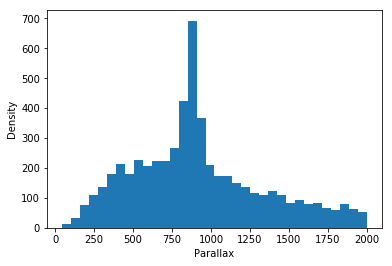

In [5]:
#plot恒星在距离上的分布的密度柱状图
plt.hist(p, bins='auto')
plt.xlabel('Parallax')
plt.ylabel('Density')
plt.show()

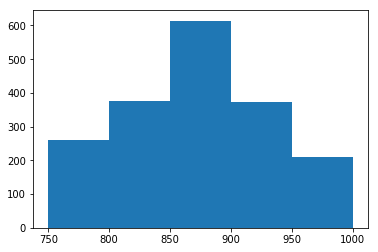

In [6]:
#let's zoom in a little:
plt.hist(p, bins=5, range=(750,1000))
plt.show()


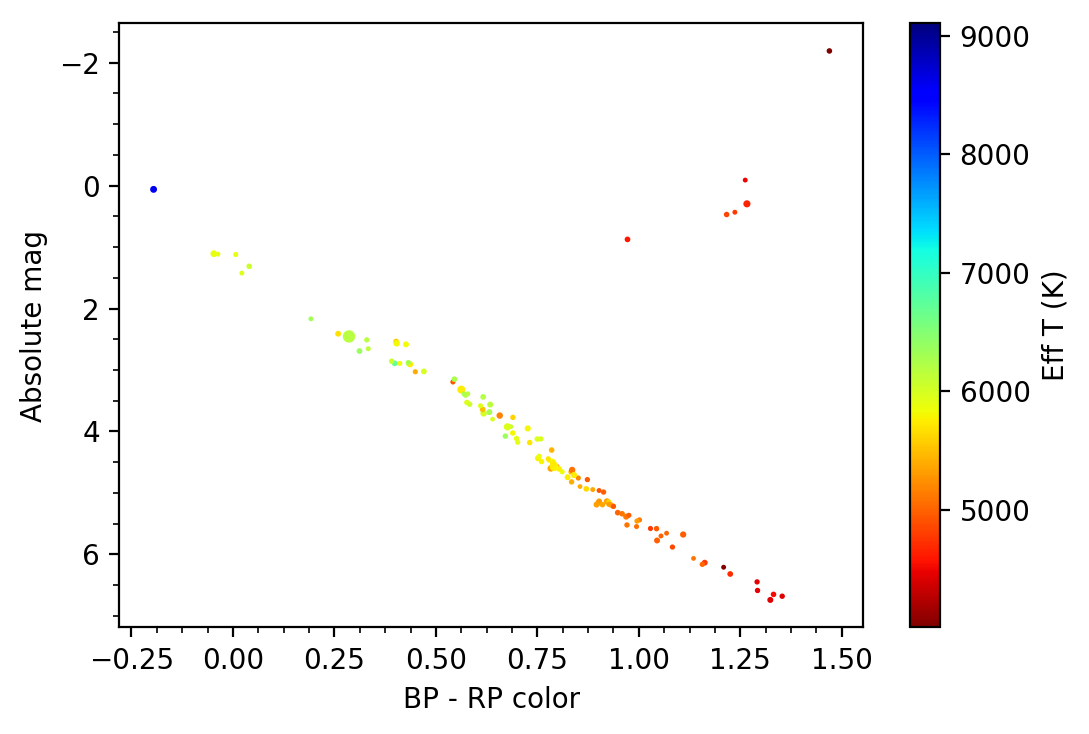

In [7]:
#plot CMD （color-magnitude diagram）

plt.rcParams['figure.dpi']= 200
plt.minorticks_on()
#s=rad makes the point proportional to the radius
plt.scatter(color1,mag1, marker='o',c=temp1,cmap='jet_r',s=rad)
#plt.scatter(color,mag, marker='.')  this is without the color bar and the radius 
plt.xlabel('BP - RP color')
plt.ylabel('Absolute mag')
plt.title=('Guans Plot')
plt.colorbar(label='Eff T (K)') #remove this if you remove the T color bar
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()

## 接下来用确定后的M67范围内的恒星来plot赫罗图，并和MESA模型比对，找到最理想的模型

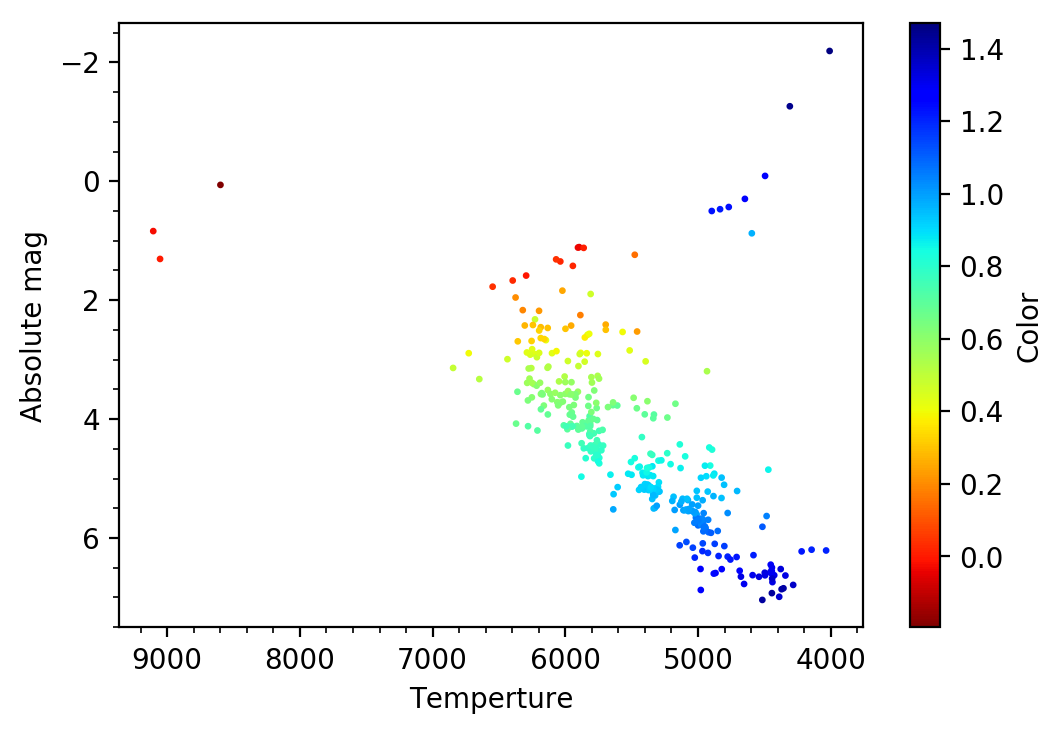

In [8]:
#赫罗图

plt.rcParams['figure.dpi']= 200
plt.minorticks_on()
#s=rad makes the point proportional to the radius
plt.scatter(temp1,mag1, marker='o',c=color1,cmap='jet_r',s=2)
# plt.scatter(color,mag, marker='.')  this is without the color bar and the radius 
plt.xlabel('Temperture')
plt.ylabel('Absolute mag')
#plt.title=('Runquans Plot')
plt.colorbar(label='Color') #remove this if you remove the T color bar
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()


In [9]:
#然后叠加一下模型的图层

from astropy.io import ascii

In [15]:

# directory = ''  # If files are in the same folder as notebook
directory = '' 

# read in our file -- filename is the string containing the directory
# where the full dataset is, plus the string of the particular filename.

files = directory +''

h1 = ascii.read(directory+'historym0.7.data',header_start=4,data_start=5)
h2 = ascii.read(directory+'historyd1.data',header_start=4,data_start=5)
h3 = ascii.read(directory+'historym1_17.data',header_start=4,data_start=5)
h4 = ascii.read(directory+'historym1_47.data',header_start=4,data_start=5)
h5 = ascii.read(directory+'historym1_5.data',header_start=4,data_start=5)
h6 = ascii.read(directory+'historym1_6.data',header_start=4,data_start=5)
h7 = ascii.read(directory+'historym1_77.data',header_start=4,data_start=5)
h8 = ascii.read(directory+'historym2_3.data',header_start=4,data_start=5)
h9 = ascii.read(directory+'historym1_3.data',header_start=4,data_start=5)
h10 = ascii.read(directory+'historym10.data',header_start=4,data_start=5)

In [16]:
#这里我假设最好的模型是mass=1.47，然后同时plot出了1.47+-0.3的效果（展示0.3m的变化有多大）

L = [h1, h2, h3, h4,h5, h6, h7, h8, h9]#这个只是为了做一个loop，可以往这个list里面塞更多的file


names = h1.colnames #免得自己忘了参数，再打印一遍好了
print(names)

['model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lnuc', 'pp', 'cno', 'tri_alfa', 'epsnuc_M_1', 'epsnuc_M_2', 'epsnuc_M_3', 'epsnuc_M_4', 'epsnuc_M_5', 'epsnuc_M_6', 'epsnuc_M_7', 'epsnuc_M_8', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'si_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'log_Teff', 'log_L', 'log_R', 'log_g', 'v_div_csound_surf', 'log_center_T', 'log_center_Rho', 'log_cntr_P', 'log_cntr_Rho', 'log_cntr_T', 'center_mu', 'center_ye', 'center_abar', 'center_h1', 'center_he4', 'center_c12', 'center_o16', 'surface_c12', 'surface_o16', 'total_mass_h1', 'total_mass_he4', 'num_retries', 'num_backups', 'num_iters']


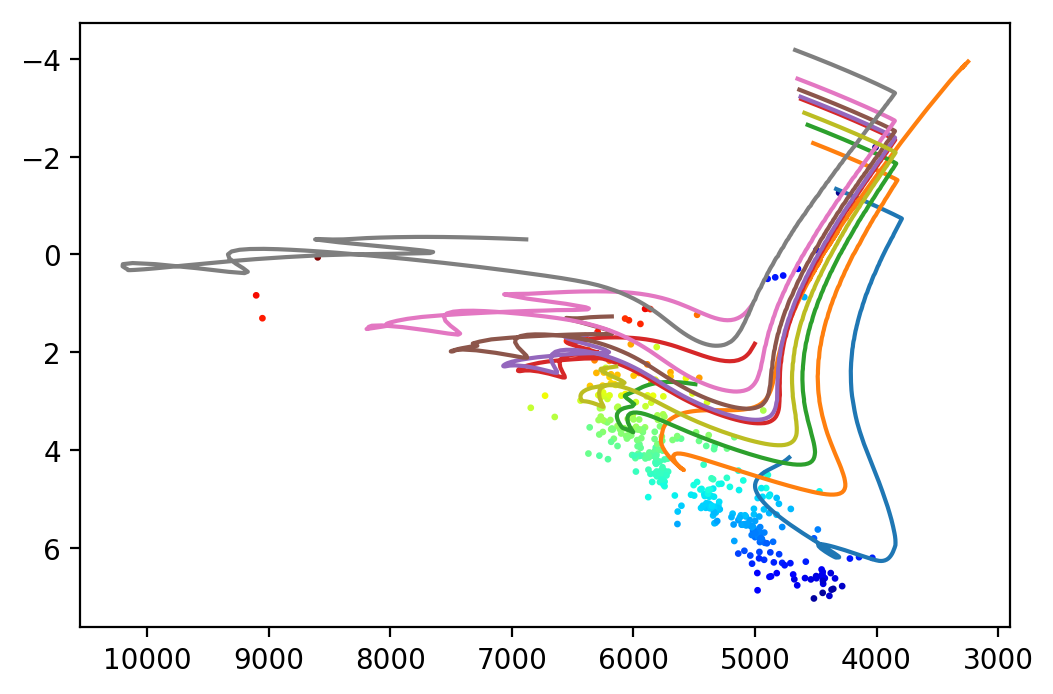

In [17]:
#先来打印模型的结果（顺序无所谓）
for i in L:
    i['log_L'] = -2.5*i['log_L'] + 4
    i['log_Teff'] = 10 ** i['log_Teff']
    plot(i['log_Teff'],i['log_L'],label = [round(i['star_mass'][0],2),'solar mass'])

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.scatter(temp1,mag1, marker='o',c=color1,cmap='jet_r',s=2)

In [169]:
#找到最合适的模型后，计算年龄。

yr = max(h9['star_age'])

yr = yr/(10**9)

print(yr)


3.5500086538747038
